In [ ]:
#Atenção! Antes de usar o colab, o csv foi importado para o Google BigQuery onde foram usados comandos 
#para criar uma nova tabela e fazer cálculos matemáticos. Nas próximas linhas será possível observar
#uma imagem que mostra os comandos em SQL usados no Google BigQuery

In [ ]:
#Importação de bibliotecas para tornar possível a demostração da imagem mencionada anteriormente
from google.colab import files
from IPython.display import Image

In [ ]:
#Comando para selecionar a imagem
uploaded = files.upload()

Saving Comandos do projeto no BigQuery.png to Comandos do projeto no BigQuery.png


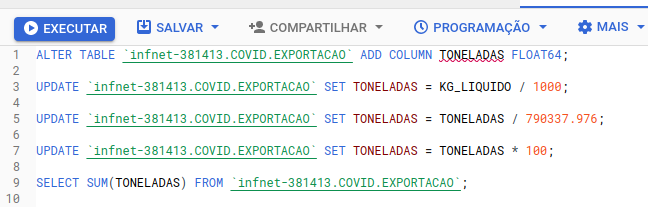

In [ ]:
#Comando para visualizar a imagem
#Observação referente a imagem:
# --> Linha 1: Criação de uma nova tabela chamada "TONELADAS"
# --> Linha 3: Converção de quilograma (coluna "KG_LIQUIDO") para tonelada
# --> Linha 5: Divisão dos valores contidos na coluna "TONELADAS" pela soma de todas as toneladas (esse valor foi achado na linha 9)  
# --> Linha 7: Multiplicação efetuada para representar em porcentagem os valores da coluna "TONELADAS"
# --> Linha 9: Soma de todas as linhas da coluna "TONELADAS". OBS: Esse comando foi efetuado antes do UPDATE da linha 5 e seu resultado foi 790337.976
Image('Comandos do projeto no BigQuery.png')

In [ ]:
#Autenticação
from google.colab import auth
auth.authenticate_user()
print ('Authenticated')

Authenticated


In [ ]:
#Montagem do Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%load_ext google.colab.data_table

In [ ]:
#Comando para realizar queries diretamente do projeto
%%bigquery --project infnet-381413
SELECT * FROM `infnet-381413.COVID.EXPORTACAO`
LIMIT 100

Query is running:   0%|          |

Downloading:   0%|          |

,CO_ANO,CO_MES,CO_NCM,CO_UNID,CO_PAIS,SG_UF_NCM,CO_VIA,CO_URF,QT_ESTAT,KG_LIQUIDO,VL_FOB,TONELADAS
0,2022,1,72279000,10,160,MG,1,717600,112554,112554,55263,0.0
1,2022,1,61046200,11,245,SC,4,817700,19,3,126,0.0
2,2022,1,85334011,11,589,RS,4,817700,800,16,1914,0.0
3,2022,1,82055900,10,741,SP,4,817700,64,64,1879,0.0
4,2022,1,34021190,10,169,SP,4,817700,1202,1202,5444,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2022,2,90230000,10,23,SP,4,817700,0,0,77,0.0
96,2022,2,84821010,11,63,SP,4,817700,48,24,688,0.0
97,2022,2,94032000,11,161,SC,1,917800,4,48,2489,0.0
98,2022,2,12019000,21,267,SP,1,917800,150,150170,80151,0.0


In [ ]:
#Agrupamento da coluna "SG_UF_NCM" e renomeação da coluna "TONELADAS" para "TONELADAS_PORCENTAGEM"
#Obs: Os estados brasileiros que apresentam a porcentagem igual a zero tem esse valor, pois as exportações foram inferiores a 0,05%
%%bigquery --project infnet-381413
SELECT SG_UF_NCM, SUM(TONELADAS) as TONELADAS_PORCENTAGEM, COUNT(*) FROM `infnet-381413.COVID.EXPORTACAO`
GROUP BY SG_UF_NCM;


Query is running:   0%|          |

Downloading:   0%|          |

,SG_UF_NCM,TONELADAS_PORCENTAGEM,f0_
0,MG,8.0,42
1,SC,5.0,105
2,RS,8.0,136
3,SP,16.0,439
4,PR,2.0,91
5,RJ,0.0,40
6,ES,4.0,41
7,BA,11.0,20
8,PA,0.0,16
9,MA,0.0,25


In [ ]:
#Para manipular o CSV do Google BigQuery, foi necessário atribuir o mesmo a sigla "df" (data frame)
%%bigquery df --project infnet-381413
SELECT SG_UF_NCM, SUM(TONELADAS) as TONELADAS_PORCENTAGEM, COUNT(*) FROM `infnet-381413.COVID.EXPORTACAO`
GROUP BY SG_UF_NCM;


Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
#Exclusão da coluna "f0_"
df = df.drop('f0_',axis=1)
df

,SG_UF_NCM,TONELADAS_PORCENTAGEM
0,MG,8.0
1,SC,5.0
2,RS,8.0
3,SP,16.0
4,PR,2.0
5,RJ,0.0
6,ES,4.0
7,BA,11.0
8,PA,0.0
9,MA,0.0


In [ ]:
#Importação da biblioteca matplotlib para geração de gráficos

import matplotlib.pyplot as plt

<Axes: xlabel='SG_UF_NCM'>

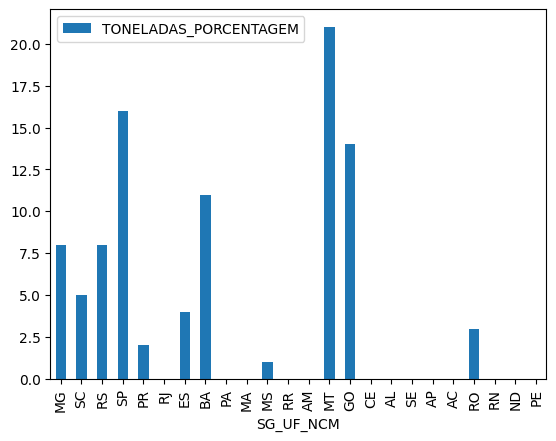

In [ ]:
#Geração do gráfico de barras para mostrar a porcentagem total de toneladas exportadas por estados brasileiros no ano de 2022

df.plot.bar('SG_UF_NCM','TONELADAS_PORCENTAGEM')

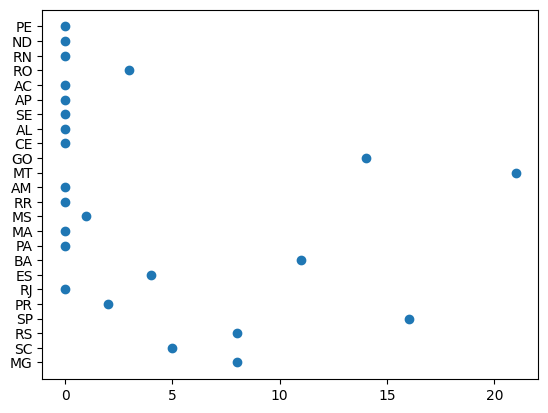

In [ ]:
#Geração do gráfico de dispersão para mostrar a porcentagem total de toneladas exportadas por estados brasileiros no ano de 2022
x=df['SG_UF_NCM']
y=df['TONELADAS_PORCENTAGEM']
plt.scatter(y, x)